<a href="https://colab.research.google.com/github/javimartinezg13/03MAIR-Algoritmos-De-Optimizacion/blob/main/JavierMartinezGarcia_Algoritmos_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritmos de optimización - Actividad guiada 2

Nombre: Javier Martínez García

URL: [https://colab.research.google.com/drive/1KmhrGEmc1Fcfe2NiwAiUFH0gdeWxvaLb?usp=sharing](https://colab.research.google.com/drive/1KmhrGEmc1Fcfe2NiwAiUFH0gdeWxvaLb?usp=sharing)

GitHub: [https://github.com/javimartinezg13/03MAIR-Algoritmos-De-Optimizacion](https://github.com/javimartinezg13/03MAIR-Algoritmos-De-Optimizacion)

In [ ]:
from functools import wraps
from time import time
def duration(f):
    @wraps(f)  
    def timing(*args, **kwargs):
        init = time()
        fun_result = f(*args, **kwargs)
        end = time()
        print('Elapsed time %d ms' %((end - init)*1000))
        return fun_result
    return timing

Sí que está realizada la **ampliación de nota** de esta actividad.

## Viaje por el río:

In [ ]:
import math

TARIFAS = [
[0,5,4,3,999,999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

In [ ]:
def Precios(TARIFAS):
################################################################  
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n 
  RUTA = [ [""]*N for i in [""]*N]
  
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6) 


La ruta es:


'0,0,2,5'

## Problema de asignación de tarea:

In [ ]:
COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [ ]:
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR
  
valor((0, 1, 2, 3  ),COSTES)

73

In [ ]:
def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CS((0,1),COSTES)

74

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
@duration
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      


ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4
Elapsed time 2 ms


In [ ]:
import itertools

@duration
def fuerza_bruta(COSTES):
    mejor_valor=10e10
    mejor_solucion= ''
    
    for S in list(itertools.permutations(range(len(COSTES)))):
      valor_tmp = valor(S, COSTES)
      if valor_tmp < mejor_valor:
        mejor_solucion=S
        mejor_valor=valor_tmp
        
    print("La mejor solucion es :" ,mejor_solucion)
    
    
fuerza_bruta(COSTES)

La mejor solucion es : (0, 3, 1, 2)
Elapsed time 1 ms


Utilizando fuerza bruta para la resolución de este problema la complejidad que encontraremos será de **O(n!)**.
Esto quiere decir que cuando vayamos aumentando las dimensiones el algoritmo irá empeorando sus resultados hasta el punto de dejar de funcionar, debido, a como hemos dicho, su complejidad computacional.
Vemos que para un ejemplo con una dimensión pequeña (4x4) el algoritmo lo hace en un tiempo de ejecución mínimo. Ahora vamos a probar como funciona con fuerza bruta si vamos aumentando dichas dimensiones, y para ello vamos a generar matrices:

In [ ]:
from random import randint
def matrix_generator(dimension):
  matrix = []
  for _ in range(dimension):
    row = []
    for _ in range(dimension):
      row.append(randint(10, 50))
    matrix.append(row)
  return matrix


matriz_5d =matrix_generator(5)
matriz_6d=matrix_generator(6)
matriz_7d=matrix_generator(7)
matriz_8d=matrix_generator(8)
matriz_9d=matrix_generator(9)


print("En el caso de 5 dimensiones:")
fuerza_bruta(matriz_5d)
print("En el caso de 6 dimensiones:")
fuerza_bruta(matriz_6d)
print("En el caso de 7 dimensiones:")
fuerza_bruta(matriz_7d)
print("En el caso de 8 dimensiones:")
fuerza_bruta(matriz_8d)
print("En el caso de 9 dimensiones:")
fuerza_bruta(matriz_9d)

En el caso de 5 dimensiones:
La mejor solucion es : (0, 1, 3, 4, 2)
Elapsed time 0 ms
En el caso de 6 dimensiones:
La mejor solucion es : (2, 4, 5, 0, 3, 1)
Elapsed time 0 ms
En el caso de 7 dimensiones:
La mejor solucion es : (0, 1, 4, 3, 6, 5, 2)
Elapsed time 6 ms
En el caso de 8 dimensiones:
La mejor solucion es : (4, 3, 2, 7, 1, 6, 0, 5)
Elapsed time 102 ms
En el caso de 9 dimensiones:
La mejor solucion es : (8, 1, 2, 6, 7, 3, 4, 5, 0)
Elapsed time 461 ms


Vemos que una vez llegamos a la dimensión 9x9 el tiempo de ejecución aumenta considerablemente y empieza a tener poca utilidad debido a su complejidad.

Ahora vamos a ver también en el **algoritmo de ramificación y poda** si hay algún valor a partir del cual empieza a no ser una opción válida:

In [ ]:
matriz_10d=matrix_generator(10)
matriz_11d=matrix_generator(11)

print("En el caso de 5 dimensiones:")
ramificacion_y_poda(matriz_5d)
print("En el caso de 6 dimensiones:")
ramificacion_y_poda(matriz_6d)
print("En el caso de 7 dimensiones:")
ramificacion_y_poda(matriz_7d)
print("En el caso de 8 dimensiones:")
ramificacion_y_poda(matriz_8d)
print("En el caso de 9 dimensiones:")
ramificacion_y_poda(matriz_9d)
print("En el caso de 10 dimensiones:")
ramificacion_y_poda(matriz_10d)
print("En el caso de 11 dimensiones:")
ramificacion_y_poda(matriz_11d)

En el caso de 5 dimensiones:
La solucion final es: [{'s': (4, 1, 0, 2, 3), 'ci': 68}]  en  88  iteraciones  para dimension:  5
Elapsed time 3 ms
En el caso de 6 dimensiones:
La solucion final es: [{'s': (3, 5, 0, 4, 1, 2), 'ci': 99}]  en  67  iteraciones  para dimension:  6
Elapsed time 3 ms
En el caso de 7 dimensiones:
La solucion final es: [{'s': (0, 1, 6, 3, 2, 5, 4), 'ci': 135}]  en  535  iteraciones  para dimension:  7
Elapsed time 42 ms
En el caso de 8 dimensiones:
La solucion final es: [{'s': (6, 4, 2, 1, 0, 7, 5, 3), 'ci': 142}]  en  798  iteraciones  para dimension:  8
Elapsed time 62 ms
En el caso de 9 dimensiones:
La solucion final es: [{'s': (8, 1, 2, 5, 6, 7, 3, 4, 0), 'ci': 111}]  en  528  iteraciones  para dimension:  9
Elapsed time 39 ms
En el caso de 10 dimensiones:
La solucion final es: [{'s': (4, 1, 0, 6, 9, 7, 5, 2, 3, 8), 'ci': 169}]  en  4218  iteraciones  para dimension:  10
Elapsed time 1767 ms
En el caso de 11 dimensiones:
La solucion final es: [{'s': (8, 6, 1,

Vemos que ya cuando sobrepasamos las 10 dimensiones el tiempo de ejecución del algoritmo realizado por ramificación y poda empieza a ser considerablemente elevado.

## Descenso de gradiente:

Primero vamos a realizarlo con la función **paraboloide**:

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
#import scipy as sc

import random

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2+X[1]**2      #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

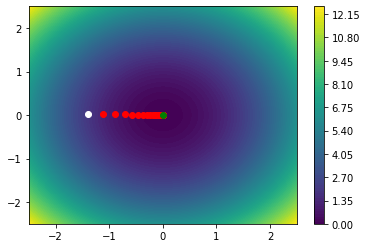

Solucion: [-4.9053944134035435e-49, 9.190478803780825e-51] 2.407134084111497e-97


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje
TA=.1 

#Iteraciones
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

Si ahora en vez de hacerlo para la función paraboloide, lo hacemos para la **nueva función**:

Debido a la complejidad y la dificultad que supone el cálculo de la derivada de dicha función, aproximaremos el valor del gradiente en un punto por su definición:

In [ ]:
f_2 = lambda x: np.sin(1/2*x[0]**2-1/4*x[1]**2+3)*np.cos(2*x[0]+1-np.e**x[1])
def df_2(PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for it,th in enumerate(PUNTO):
    T[it] = T[it] + h
    grad[it] = (f_2(T)-f_2(PUNTO)) / h
  return grad

La preparación de datos para su posterior graficación la llevamos a cabo de forma similar:

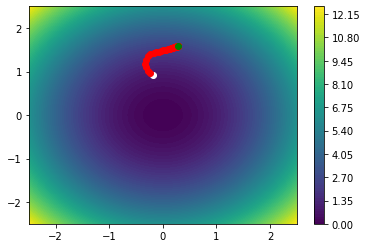

Solucion: [0.2902910349495964, 1.5884347142361555] 2.607393726362605


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje
TA=.1 

#Iteraciones
for _ in range(500):
  grad = df_2(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))